In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

cc_df = pd.read_csv("../Data/creditcard.csv").rename({"Class": "Fraud_Flag"}, axis=1)

cc_df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Fraud_Flag
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [2]:
cc_df["Fraud_Flag"].value_counts()

Fraud_Flag
0    284315
1       492
Name: count, dtype: int64

In [3]:
cc_df["Fraud_Flag"].value_counts(normalize=True)

Fraud_Flag
0    0.998273
1    0.001727
Name: proportion, dtype: float64

<Axes: xlabel='Fraud_Flag'>

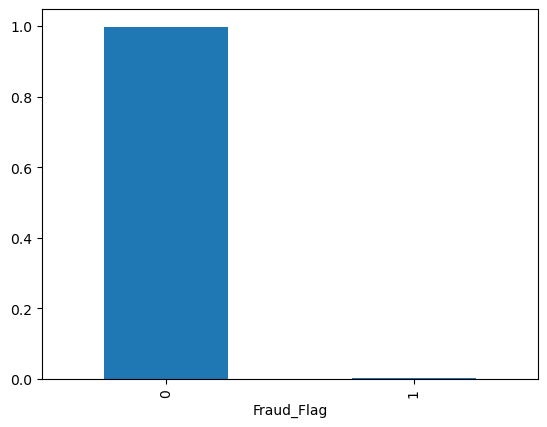

In [4]:
cc_df["Fraud_Flag"].value_counts(normalize=True).plot.bar()

In [5]:
cc_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   Time        284807 non-null  float64
 1   V1          284807 non-null  float64
 2   V2          284807 non-null  float64
 3   V3          284807 non-null  float64
 4   V4          284807 non-null  float64
 5   V5          284807 non-null  float64
 6   V6          284807 non-null  float64
 7   V7          284807 non-null  float64
 8   V8          284807 non-null  float64
 9   V9          284807 non-null  float64
 10  V10         284807 non-null  float64
 11  V11         284807 non-null  float64
 12  V12         284807 non-null  float64
 13  V13         284807 non-null  float64
 14  V14         284807 non-null  float64
 15  V15         284807 non-null  float64
 16  V16         284807 non-null  float64
 17  V17         284807 non-null  float64
 18  V18         284807 non-null  float64
 19  V1

In [6]:
from sklearn.model_selection import train_test_split


X = pd.get_dummies(cc_df.iloc[:, 1:30], dtype="int", drop_first=True)
y = cc_df["Fraud_Flag"]


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2023)

In [7]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(max_iter=1000)

lr = logreg.fit(X_train, y_train)

print(f"Train Accuracy: {lr.score(X_train, y_train)}")
print(f"Test Accuracy: {lr.score(X_test, y_test)}")

Train Accuracy: 0.9991968224011938
Test Accuracy: 0.9991397773954567


In [8]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score

y_pred = lr.predict(X_test)

confusion_matrix(y_test, y_pred)

array([[56863,     9],
       [   40,    50]])

In [9]:
precision_score(y_test, y_pred)

0.847457627118644

In [10]:
recall_score(y_test, y_pred)

0.5555555555555556

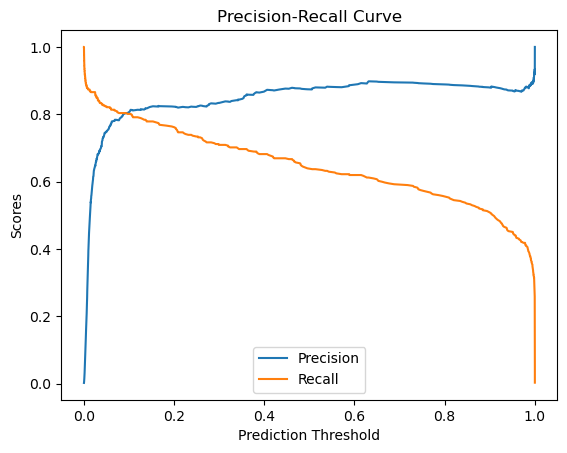

In [11]:
from sklearn.metrics import precision_recall_curve

p_curve, r_curve, t_curve = precision_recall_curve(y_train, lr.predict_proba(X_train)[:,1])

# p_r_curve = pd.DataFrame({"precision": p_curve, "recall": r_curve, "threshold": t_curve})
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt

plt.plot(t_curve, p_curve[:-1], label='Precision')
plt.plot(t_curve, r_curve[:-1], label='Recall')
plt.xlabel('Prediction Threshold')
plt.ylabel('Scores')
plt.legend()
plt.title('Precision-Recall Curve')
# plt.grid(True)
plt.show()

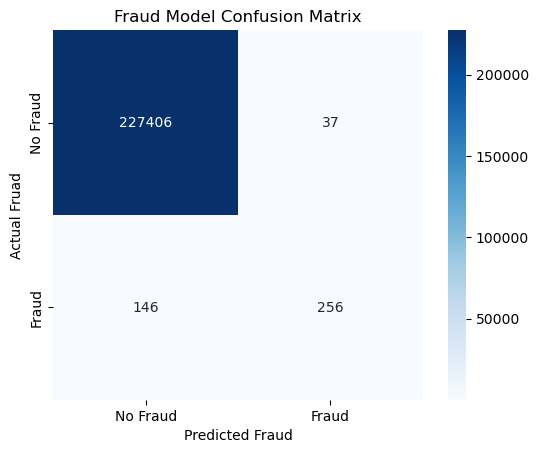

In [12]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

y_pred = lr.predict(X_train)

knn_confusion = confusion_matrix(y_train, y_pred)

sns.heatmap(
    knn_confusion, 
    cmap="Blues",  
    annot=True, 
    fmt="g",
    square=True,
    xticklabels=["No Fraud", "Fraud"],        
    yticklabels=["No Fraud", "Fraud"]
).set(
    xlabel='Predicted Fraud',
    ylabel='Actual Fruad',
    title='Fraud Model Confusion Matrix'
);

In [13]:
print(f"Training Precision: {round(precision_score(y_train, y_pred), 2)}")
print(f"Training Recall: {round(recall_score(y_train, y_pred), 2)}")

Training Precision: 0.87
Training Recall: 0.64


In [14]:
print(f"Training Recall: {recall_score(y_train, y_pred)}")

Training Recall: 0.6368159203980099


In [16]:
from sklearn.metrics import f1_score

y_probs = lr.predict_proba(X_train)[:, 1] 
thresholds = t_curve
f1_scores = [f1_score(y_train, (y_probs >= threshold)) for threshold in thresholds]

plt.figure(figsize=(8, 6))
plt.plot(thresholds, f1_scores, label="F1")
plt.plot(t_curve, p_curve[:-1], label='Precision')
plt.plot(t_curve, r_curve[:-1], label='Recall')
plt.xlabel('Threshold')
plt.ylabel('Metric Score')
plt.title('F1, Precision & Recall vs. Threshold')
plt.show()


KeyboardInterrupt



In [ ]:
np.array(f1_scores).argmax()

In [ ]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

y_pred = lr.predict_proba(X_train)[:, 1] > .103

knn_confusion = confusion_matrix(y_train, y_pred)

sns.heatmap(
    knn_confusion, 
    cmap="Blues",  
    annot=True, 
    fmt="g",
    square=True,
    xticklabels=["No Fraud", "Fraud"],        
    yticklabels=["No Fraud", "Fraud"]
).set(
    xlabel='Predicted Fraud',
    ylabel='Actual Fraud',
    title='Fraud Model Confusion Matrix'
);

In [ ]:
plt.figure(figsize=(8, 6))
plt.plot(thresholds, f1_scores, label="F1")
plt.plot(t_curve, p_curve[:-1], label='Precision')
plt.plot(t_curve, r_curve[:-1], label='Recall')
plt.legend()
plt.xlabel('Threshold')
plt.ylabel('Metric Score')
plt.title('F1, Precision & Recall vs. Threshold')
plt.show()

In [ ]:
# default equal weight model
lr = LogisticRegression(max_iter=1000)

# rebalance the weighting so the 'total' weight of each class is equal
lr_balanced = LogisticRegression(class_weight='balanced', max_iter=1000) 

# intermediate weight (minority class has 4x weight of majority)
lr_4x = LogisticRegression(class_weight={1: 4, 0: 1}, max_iter=1000)

In [ ]:
# equally weighted model (default) 
lr.fit(X_train, y_train)

# multiplies minority by common:rare ratio
lr_balanced.fit(X_train, y_train)

# intermediate weight (4x minority)
lr_4x.fit(X_train, y_train)

In [ ]:
f1_score(y_test, lr.predict(X_test))

In [ ]:
f1_score(y_test, lr_balanced.predict(X_test))

In [ ]:
f1_score(y_test, lr_4x.predict(X_test))

In [ ]:
from sklearn.metrics import roc_curve, auc

y_probs = lr_4x.predict_proba(X_test)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, y_probs)

auc_score = auc(fpr, tpr)

auc_score

In [ ]:
lr_4x.score(X_test, y_test)

In [ ]:
import imblearn.over_sampling as OS

n_pos = np.sum(y_train == 1)
n_neg = np.sum(y_train == 0)

# create 4x as many positive samples
ratio = {1 : n_pos * 4, 0 : n_neg}

# randomly oversample positives
ROS = OS.RandomOverSampler(
    sampling_strategy = ratio,
    random_state=2023
)

X_train_rs, y_train_rs = ROS.fit_resample(X_train, y_train)

print(f"Original Positive Class Count: {np.sum(y_train)}")
print(f"Oversample Positive Class Count: {np.sum(y_train_rs)}")

In [ ]:
lr.fit(X_train, y_train)

print(f"Original Test F1: {f1_score(y_test, lr.predict(X_test))}")

In [ ]:
lr.fit(X_train_rs, y_train_rs)

print(f"Oversampled Test F1: {f1_score(y_test, lr.predict(X_test))}")

In [ ]:
np.sum(y_train_rs)

In [ ]:
len(y_train_rs)

In [ ]:
import imblearn.under_sampling as US

# Define Minority Class %
minority_pct = .30

# randomly undersample negative samples: 
RUS = US.RandomUnderSampler(
                   sampling_strategy = (minority_pct)/(1 - minority_pct),
                   random_state=2023
)

X_train_rs, y_train_rs = RUS.fit_resample(X_train, y_train)

print(f"Original Negative Class Count: {np.mean(y_train)}")
print(f"Undersample Negative Class Count: {np.mean(y_train_rs)}")

In [ ]:
lr.fit(X_train, y_train)

print(f"Original Test F1: {f1_score(y_test, lr.predict(X_test))}")

In [ ]:
lr.fit(X_train_rs, y_train_rs)

print(f"Oversampled Test F1: {f1_score(y_test, lr.predict(X_test))}")

In [ ]:
import imblearn.over_sampling

n_pos = np.sum(y_train == 1)
n_neg = np.sum(y_train == 0)

# create 4x as many positive samples
ratio = {1 : n_pos * 4, 0 : n_neg}

# SMOTE oversampling for positives
smt = imblearn.over_sampling.SMOTE(
    sampling_strategy = ratio,
    random_state=2023
)

X_train_rs, y_train_rs = smt.fit_resample(X_train, y_train)

In [ ]:
lr.fit(X_train, y_train)

print(f"Original F1: {f1_score(y_test, lr.predict(X_test))}")

In [ ]:
lr.fit(X_train_rs, y_train_rs)

print(f"SMOTE F1: {f1_score(y_test, lr.predict(X_test))}")

In [ ]:
import numpy as np

np.array([[20, 5], [5, 20]])